In [1]:
import os
import numpy as np
from nibabel.testing import data_path
import nibabel as nib
import matplotlib.pyplot as plt

PATH_DATA = '/Users/aramsevagavarian/Projet/lumbar-dataset-epfl/'
os.chdir(PATH_DATA)

nsamples = 11

imgData = {} #Image headers and data
labelData = {} #Label headers and data
img = {} #Images
label = {} #Labels

#Get image and label data
for n in range(nsamples):
    if n < 9:
        filename = os.path.join('sub-0'+str(n+1)+"/anat/", 'sub-0'+str(n+1)+'_T2w.nii.gz')
        imgData['sub-'+str(n+1)] = (nib.load(filename))
    if n >= 9:
        filename = os.path.join('sub-'+str(n+1)+"/anat/", 'sub-'+str(n+1)+'_T2w.nii.gz')
        imgData['sub-'+str(n+1)] = (nib.load(filename))

for n in range(nsamples):
    if n < 9:
        filename = os.path.join('derivatives/labels/sub-0'+str(n+1)+"/anat/", 'sub-0'+str(n+1)+'_T2w_seg-manual.nii.gz')
        labelData['sub-'+str(n+1)] = (nib.load(filename))
    if n >= 9:
        filename = os.path.join('derivatives/labels/sub-'+str(n+1)+"/anat/", 'sub-'+str(n+1)+'_T2w_seg-manual.nii.gz')
        labelData['sub-'+str(n+1)] = (nib.load(filename))
        
#Get images and labels
for n in range(nsamples):
    img['sub-'+str(n+1)] = np.array(imgData['sub-'+str(n+1)].dataobj)

for n in range(nsamples):
    label['sub-'+str(n+1)] = np.array(labelData['sub-'+str(n+1)].dataobj)


In [2]:
#Data dimensions
for n in range(nsamples):
    print(imgData['sub-'+str(n+1)].shape)

(64, 640, 640)
(64, 640, 640)
(64, 640, 640)
(64, 640, 640)
(64, 640, 640)
(64, 640, 640)
(64, 640, 640)
(640, 640, 64)
(640, 640, 64)
(640, 640, 64)
(640, 640, 64)


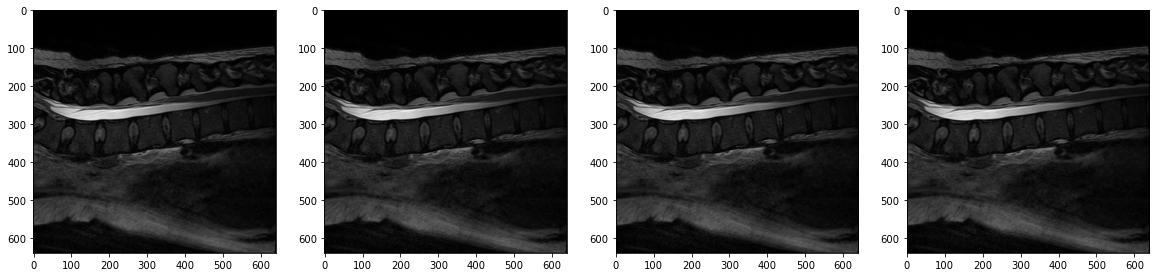

In [3]:
#Show first 4 images
plt.figure(figsize=[20, 20]);
n = 4
for i in range(n):
    plt.subplot(100+10*n+(i+1))
    plt.imshow(img['sub-'+str(n+1)][32,:,:], cmap = 'gray')

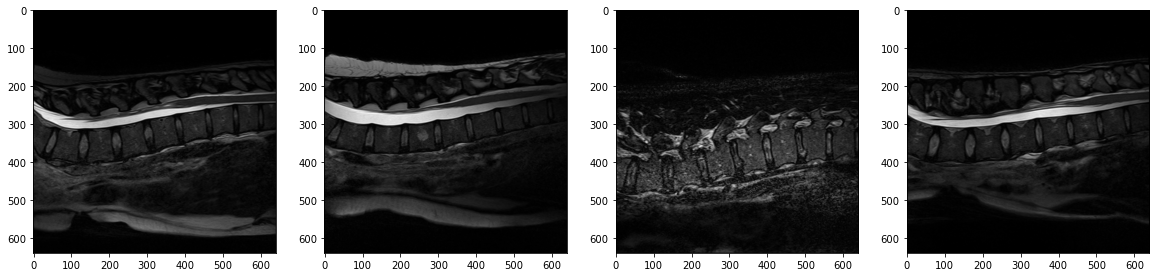

In [4]:
#Show last 4 images after flip and rotation
plt.figure(figsize=[20, 20]);
n = 4
for i in range(n):
    plt.subplot(100+10*n+(i+1))
    
    #Shift from (640,640,64) to (64,640,640)
    plt.imshow(np.rot90(np.transpose(img['sub-'+str(i+8)],(2,0,1)),2)[32,:,:],cmap = 'gray')

In [5]:
#Distance between outermost voxel & reference point
ref = [32,320,320]

for n in range(11):
    nx = []
    ny = []
    nz = []
    if n < 7:
        for i in range(64):
            if not np.all(label['sub-' + str(n+1)][i,:,:] == 0):
                nx.append(np.abs(i-ref[0]))

        for i in range(640):
            if not np.all(label['sub-' + str(n+1)][:,i,:] == 0):
                ny.append(np.abs(i-ref[1]))

        for i in range(640):
            if not np.all(label['sub-' + str(n+1)][:,:,i] == 0):
                nz.append(np.abs(i-ref[2]))
    else:
        for i in range(64):
            if not np.all(np.rot90((np.transpose(label['sub-'+ str(n+1)],(2,0,1))[i,:,:])) == 0):
                nx.append(np.abs(i-ref[0]))

        for i in range(640):
            if not np.all(np.rot90((np.transpose(label['sub-'+ str(n+1)],(2,0,1))[:,i,:])) == 0):
                ny.append(np.abs(i-ref[1]))

        for i in range(640):
            if not np.all(np.rot90((np.transpose(label['sub-'+ str(n+1)],(2,0,1))[:,:,i])) == 0):
                nz.append(np.abs(i-ref[2]))

    box = [2*np.max(nx),2*np.max(ny),2*np.max(nz)]

    print('sub-'+str(n+1)+': ',box)

sub-1:  [14, 378, 638]
sub-2:  [28, 180, 638]
sub-3:  [14, 262, 636]
sub-4:  [24, 152, 638]
sub-5:  [16, 238, 636]
sub-6:  [20, 136, 636]
sub-7:  [14, 166, 638]
sub-8:  [14, 196, 638]
sub-9:  [20, 232, 638]
sub-10:  [52, 74, 638]
sub-11:  [14, 206, 638]


<b>The box to be used has size [52,378,638]</b>

In [ ]:
#New image set with rotated images
affines = []
newImgData = []
for i in range(11):
    affines.append(imgData['sub-'+str(i+1)].affine)

for i in range(7):
    newImgData.append(imgData['sub-'+str(i+1)].dataobj)

for i in range(7,11):
    newImgData.append(np.rot90(np.transpose(imgData['sub-'+str(i+1)].dataobj,(2,0,1)),2))
    
newNiftis = []
for i in range(11):
    newNiftis.append(nib.Nifti1Image(newImgData[i], affines[i]))

In [ ]:
#New label set with rotated labels
affinesLabels = []
dataLabelNew = []

for i in range(11):
    affinesLabels.append(labelData['sub-'+str(i+1)].affine)

for i in range(7):
    dataLabelNew.append(labelData['sub-'+str(i+1)].dataobj)

for i in range(7,11):
    dataLabelNew.append(np.rot90(np.transpose(labelData['sub-'+str(i+1)].dataobj,(2,0,1)),2))
    
newNiftisLabels = []

for i in range(11):
    newNiftisLabels.append(nib.Nifti1Image(dataLabelNew[i], affinesLabels[i]))

In [ ]:
os.chdir('/Users/aramsevagavarian/Projet')

In [ ]:
if os.getcwd() != '/Users/aramsevagavarian/Projet':
    os.chdir('/Users/aramsevagavarian/Projet')

if not os.path.exists('new_data'):
    os.mkdir('new_data')
os.chdir('new_data')

if not os.path.exists('derivatives/labels'):
    os.makedirs('derivatives/labels')
    
for i in range(11):
    if i < 9:
        if not os.path.exists('sub-0'+str(i+1)):
            os.mkdir('sub-0'+str(i+1))
            os.chdir('sub-0'+str(i+1))
            os.mkdir('anat')
            os.chdir('anat')
            nib.save(newNiftis[i], os.path.join(os.getcwd(), 'sub-0'+str(i+1)+'_T2w.nii.gz'))
            os.chdir('../..')
            
            os.chdir('derivatives/labels')
            os.mkdir('sub-0'+str(i+1))
            os.chdir('sub-0'+str(i+1))
            os.mkdir('anat')
            os.chdir('anat')
            nib.save(newNiftisLabels[i], os.path.join(os.getcwd(), 'sub-0'+str(i+1)+'_T2w_seg-manual.nii.gz'))
            os.chdir('../../../..')

    else:
        if not os.path.exists('sub-'+str(i+1)):
            os.mkdir('sub-'+str(i+1))
            os.chdir('sub-'+str(i+1))
            os.mkdir('anat')
            os.chdir('anat')
            nib.save(newNiftis[i], os.path.join(os.getcwd(), 'sub-'+str(i+1)+'_T2w.nii.gz'))
            os.chdir('../..')

            os.chdir('derivatives/labels')
            os.mkdir('sub-'+str(i+1))
            os.chdir('sub-'+str(i+1))
            os.mkdir('anat')
            os.chdir('anat')
            nib.save(newNiftisLabels[i], os.path.join(os.getcwd(), 'sub-'+str(i+1)+'_T2w_seg-manual.nii.gz'))
            os.chdir('../../../..')

In [ ]:
plt.imshow(newImgData[1][32,:,:], cmap = 'gray')